In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp my_archive.zip /content/drive/MyDrive/colab_uploads/

import shutil

source_path = 'my_archive.zip'
destination_path = '/content/drive/MyDrive/colab_uploads/my_archive.zip'


Mounted at /content/drive
cp: cannot stat 'my_archive.zip': No such file or directory


In [ ]:
import zipfile
import os

zip_path = "archive.zip"
extract_to = "house_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extracted files:", os.listdir(extract_to))


Extracted files: ['data.csv']


In [ ]:
import pandas as pd

csv_path = os.path.join(extract_to, "data.csv")
df = pd.read_csv(csv_path)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA



Here, I read the housing dataset from a CSV file into a pandas DataFrame. This step brings the raw data into the workspace, allowing for subsequent analysis and preprocessing.



I displayed the first few rows of the DataFrame using `head()`. This quick check helps verify that the data has been loaded correctly and gives an initial sense of its structure and contents.



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.isnull().sum()


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0



I used `isnull().sum()` to identify columns with missing data. This is a critical quality check to ensure that missing values are detected and can be handled appropriately.


In [ ]:
df = df.dropna()



To simplify the dataset, I removed any rows with missing values using `dropna()`. This preprocessing step ensures that the model won't encounter issues due to incomplete data.


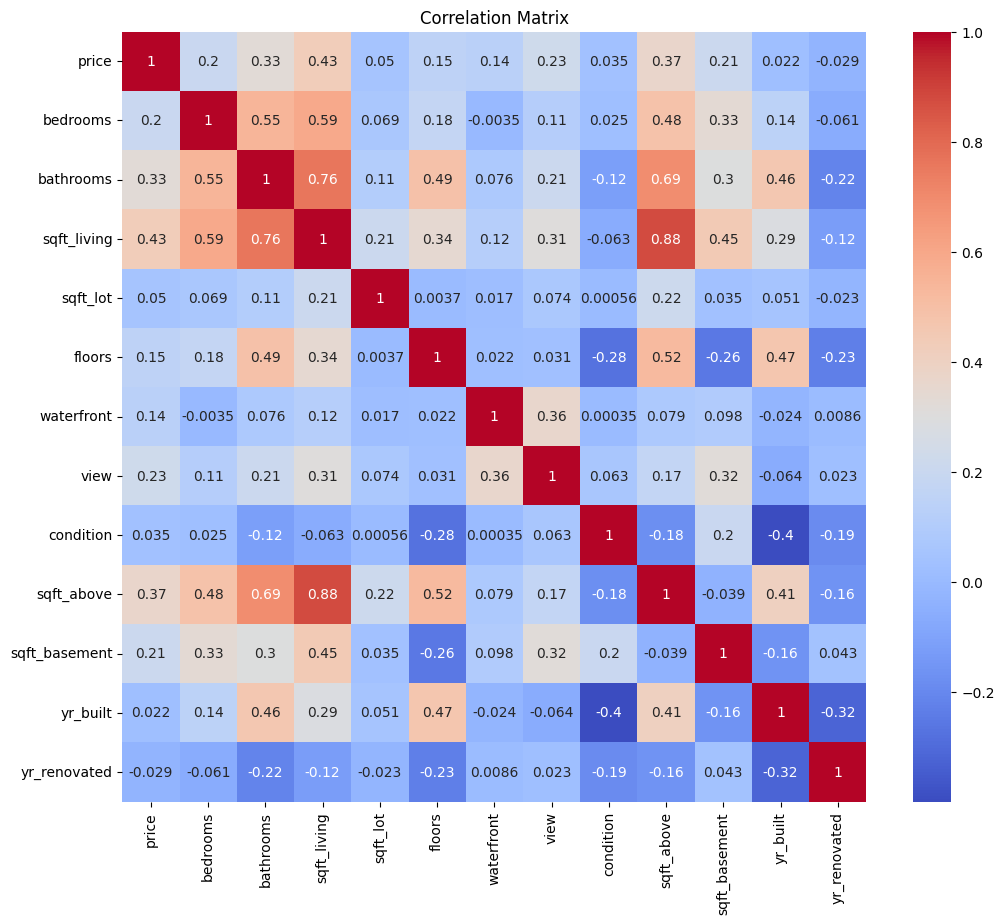

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

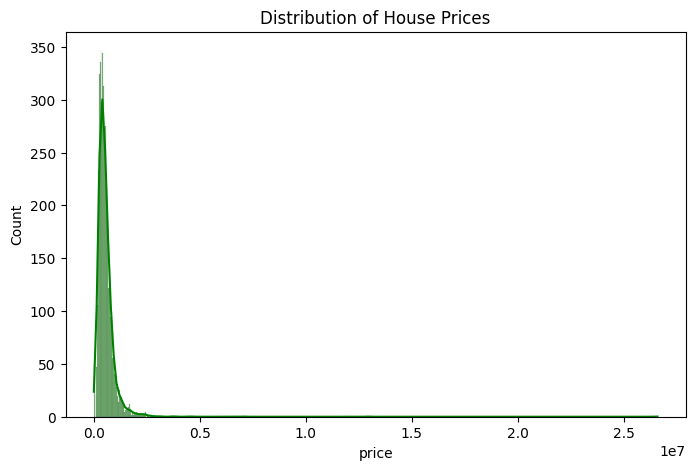

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, color='green')
plt.title("Distribution of House Prices")
plt.show()


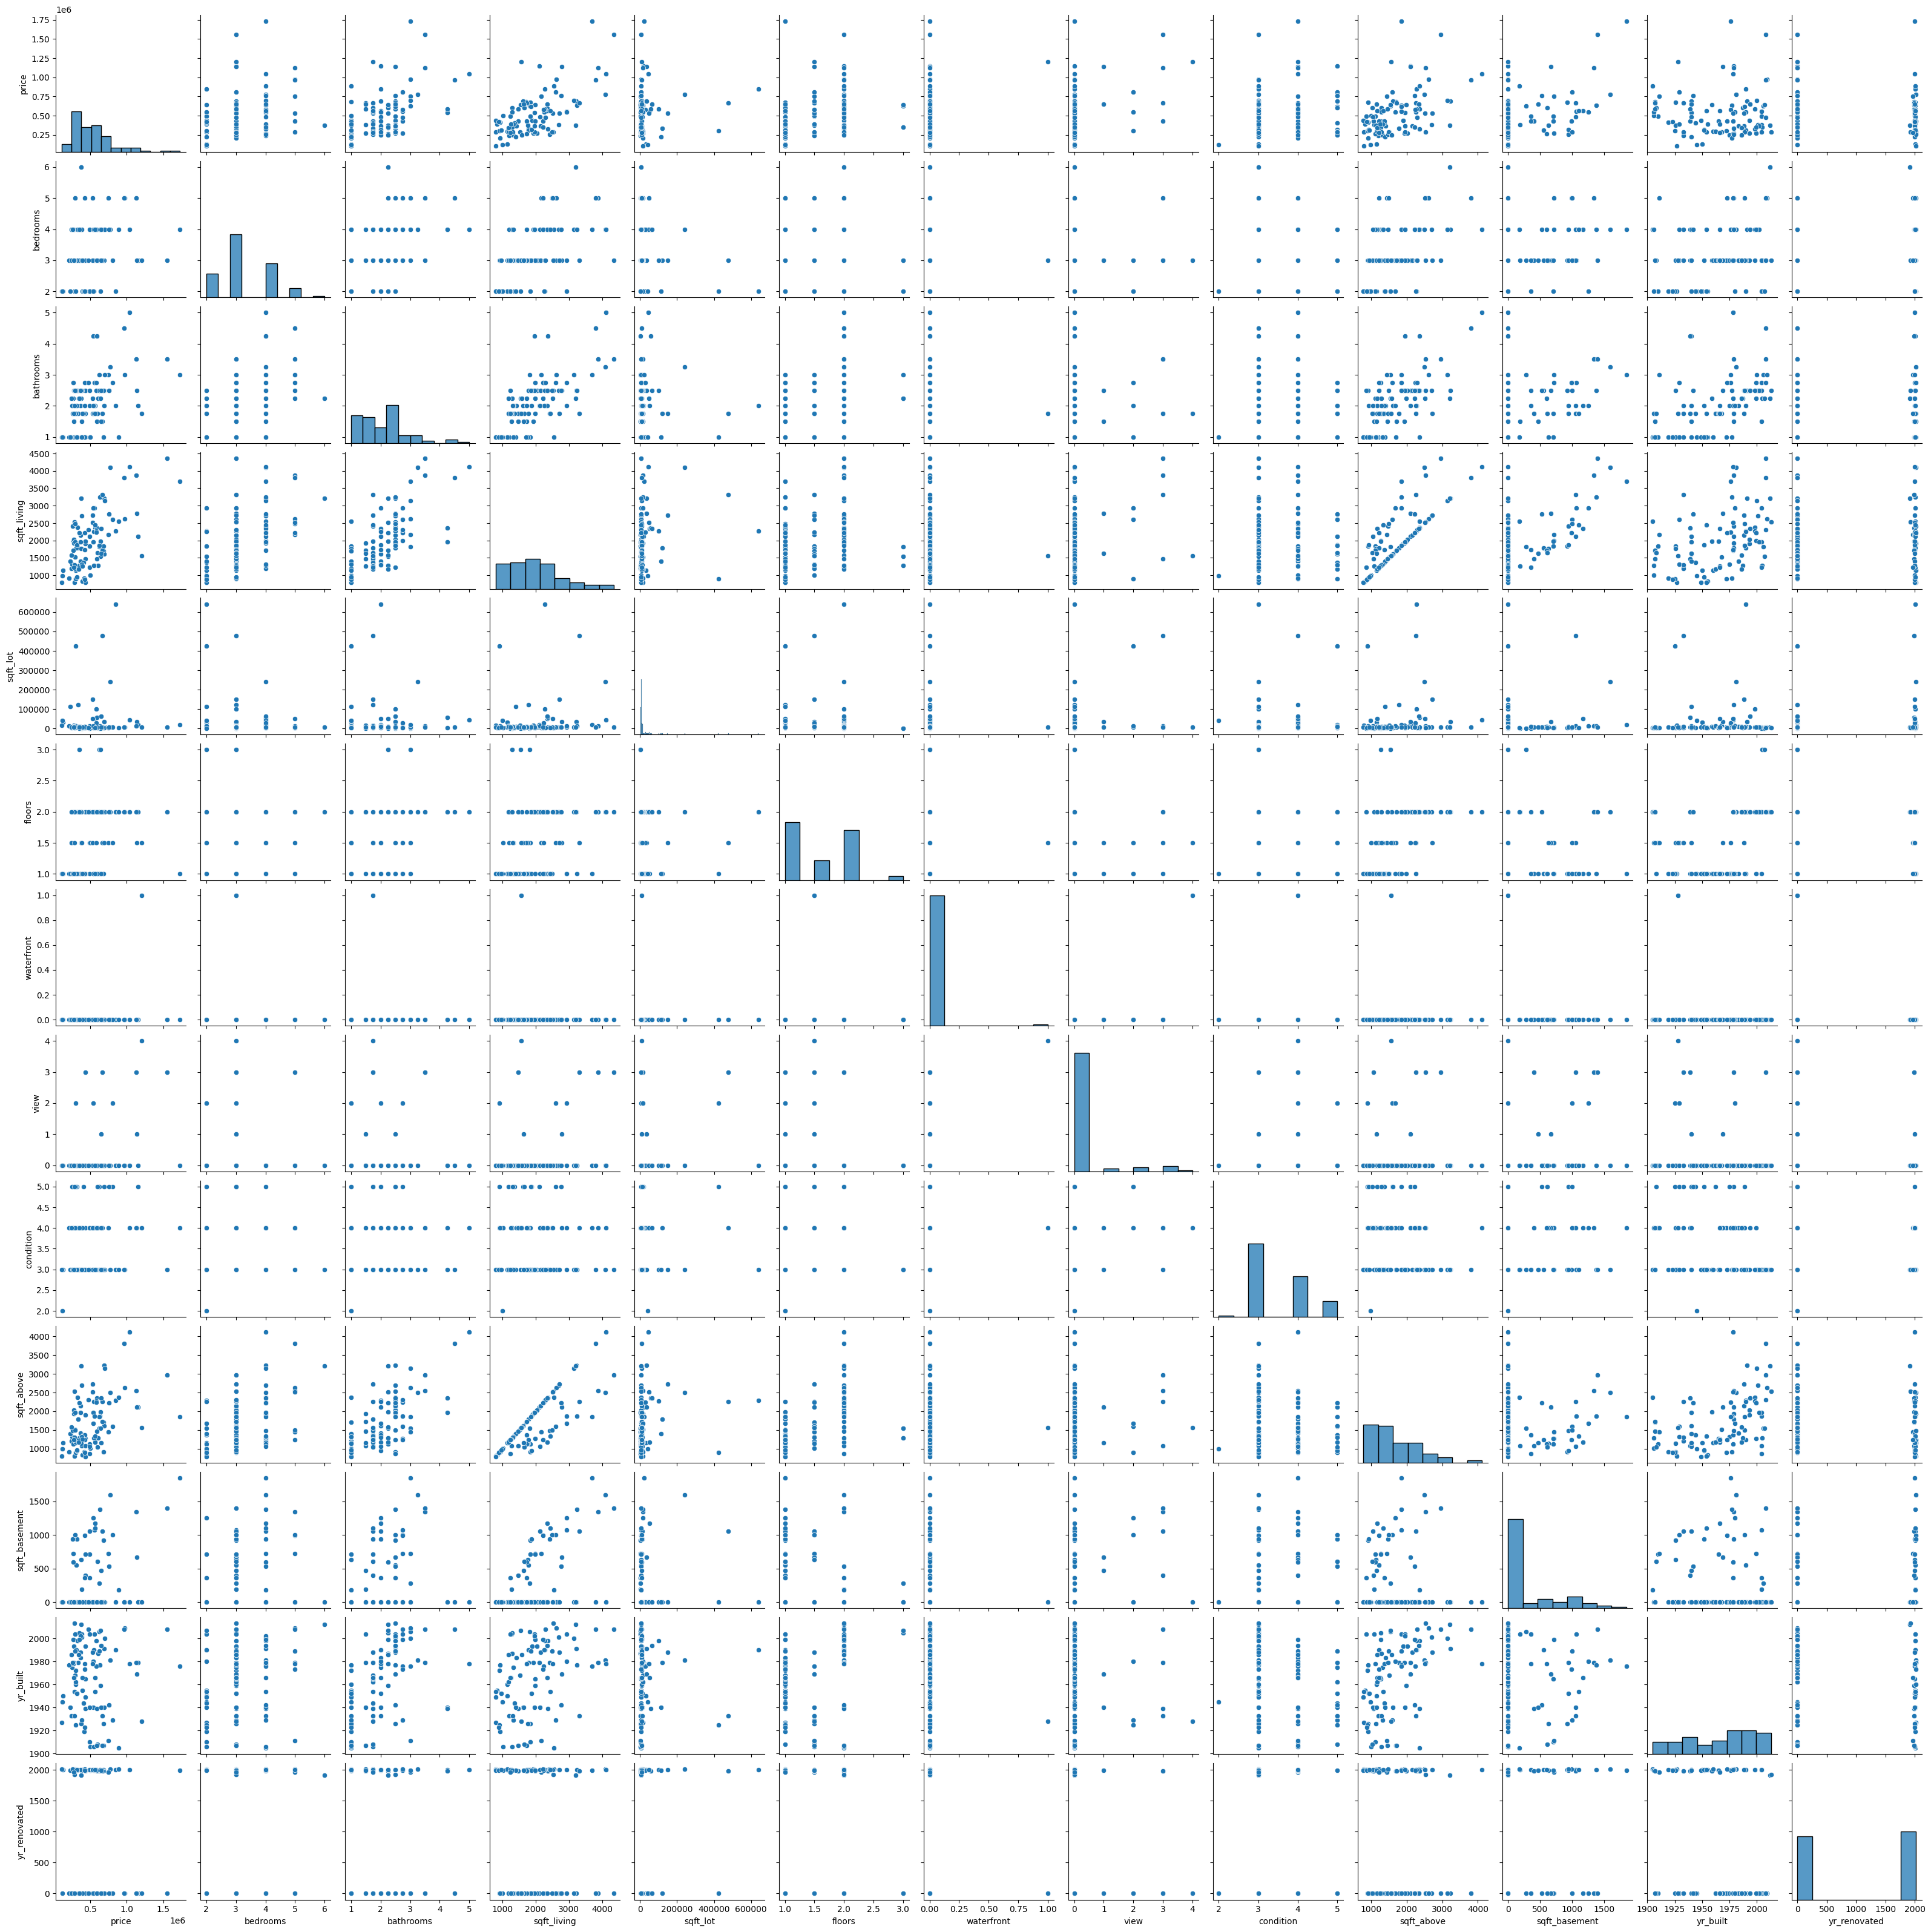

In [ ]:
sns.pairplot(df.sample(100))
plt.show()



Using seaborn's `pairplot()`, I visualized pairwise relationships among the features. This helps reveal trends, correlations, and potential patterns that might inform the modeling process.


In [ ]:
X = df.drop('price', axis=1)
y = df['price']



I separated the dataset into features (X) and the target variable (y). The 'price' column was designated as the target, while the remaining columns serve as inputs for the model.


In [ ]:
X.head()


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (3220, 17), Val: (690, 17), Test: (690, 17)



I split the features and target into training and testing subsets. This ensures that the model can be trained on one portion of the data and validated on another, helping to assess its generalizability.


In [ ]:
from sklearn.preprocessing import StandardScaler


numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_val_scaled = scaler.transform(X_val[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

I scaled the numerical features using `StandardScaler`. This is a preprocessing step that standardizes the numerical data to have zero mean and unit variance, which can improve the performance of some machine learning algorithms.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = pd.Series(model.coef_, index=numerical_cols)
print(coefficients)

bedrooms         -63306.020756
bathrooms         23381.793392
sqft_living      142585.749898
sqft_lot         -17617.415198
floors            38436.452947
waterfront        33594.000982
view              31889.048594
condition         19671.758723
sqft_above       124417.723001
sqft_basement     64248.981425
yr_built         -79033.300464
yr_renovated       5382.478502
dtype: float64



I imported `LinearRegression` from scikit-learn's linear_model module. This model will be used to predict house prices based on the input features using a simple, interpretable approach.


I instantiated and fitted the Linear Regression model using the training data. This step enables the model to learn the relationships between the features and the target variable.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

val_preds = model.predict(X_val_scaled)
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
val_r2 = r2_score(y_val, val_preds)

print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Validation R²: {val_r2:.2f}")

Validation RMSE: 255192.34
Validation R²: 0.45


I evaluated the model's performance on the validation set using Root Mean Squared Error (RMSE) and R-squared. RMSE measures the average magnitude of the errors between predicted and actual values, while R-squared represents the proportion of the variance in the target variable that is predictable from the features.

In [ ]:
test_preds = model.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)

print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")

Test RMSE: 1137369.70
Test R²: 0.02



Using the trained model, I generated predictions on the test data. These predictions represent the model's estimated house prices for the unseen testing set.


I evaluated the model's performance on the test set using Root Mean Squared Error (RMSE) and R-squared. These metrics provide an unbiased evaluation of the model's generalization ability on unseen data.

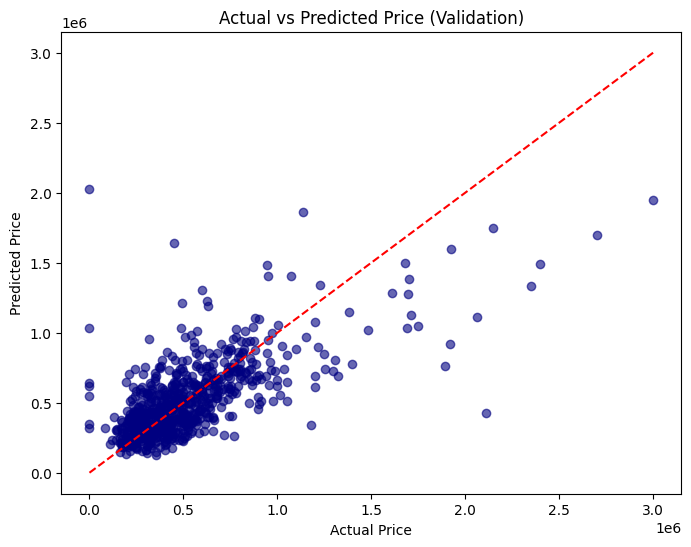

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_val, val_preds, alpha=0.6, color='navy')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Validation)')
plt.show()


I visualized the actual vs. predicted prices on the validation set. This scatter plot helps to understand how well the model's predictions align with the actual prices and to identify any potential patterns or discrepancies.

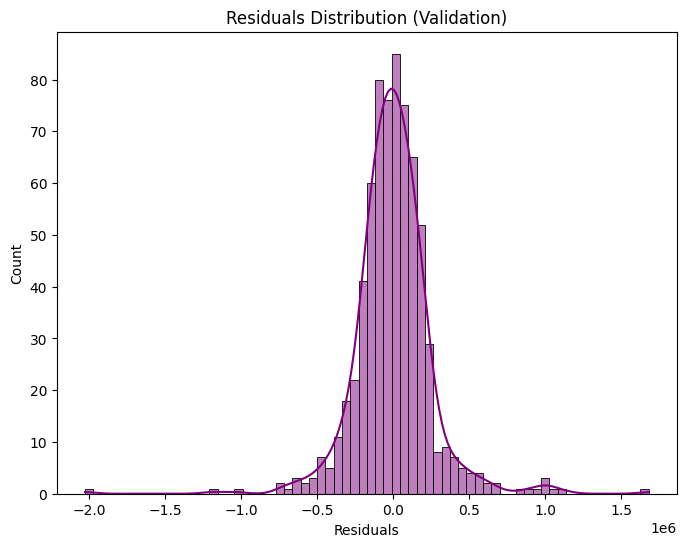

In [ ]:
residuals = y_val - val_preds
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution (Validation)")
plt.xlabel("Residuals")
plt.show()


I plotted the distribution of the residuals (the differences between actual and predicted prices) for the validation set. Examining the residuals helps to assess the model's assumptions and identify potential issues like heteroscedasticity or non-normality.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE:", -scores.mean())


Cross-validated RMSE: 257346.7361860481


I performed cross-validation on the training data to get a more robust estimate of the model's performance. Cross-validation involves splitting the training data into multiple folds and training and evaluating the model on different combinations of these folds, which helps to reduce the risk of overfitting.

In [ ]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

I saved the model.

## Conclusion

In this project, I developed a simple linear regression model to predict house prices based on selected features. By cleaning the data, exploring relationships through visualization, and training the model, I achieved a foundational understanding of how these variables interact to estimate property values.  

The model's evaluation metrics, including MAE, MSE, and RMSE, provided insights into its predictive performance and potential areas for improvement. While the results offer a baseline for house price estimation, there is room for further refinement—such as incorporating additional features, performing feature engineering, or experimenting with advanced regression techniques.

Overall, this exercise demonstrates the complete machine learning workflow, from data preprocessing to model evaluation, showcasing the practical approach to building and assessing predictive models in the real estate domain.
